# Zadanie 5
Zastosuj metodę SVD w celu redukcji wymiarowości zbioru danych Wine. Określ optymalną
liczbę komponentów do redukcji wymiarowości danych poprzez analizę wariancji wyjaśnianej
przez każdy z komponentów. Wybierz liczbę komponentów, która wyjaśnia odpowiednio dużą
część wariancji (np. minimum 95%). Przekształć oryginalny zbiór danych do przestrzeni o
mniejszej liczbie wymiarów zgodnie z wybraną liczbą komponentów. Zwizualizuj dane w nowej przestrzeni o mniejszej liczbie wymiarów za pomocą wykresu, aby zobaczyć, jak różne
odmiany wina rozkładają się w nowej przestrzeni cech.
Zbiór danych Wine z biblioteki sikit-learn zawiera wyniki chemicznych analiz trzech różnych
odmian win (klasyfikowane jako 1, 2, 3). Każda próbka ma 13 cech opisujących różne składniki
chemiczne wina. 

In [3]:
import  pandas as pd
import  numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [4]:
wine = load_wine()
data = np.c_[wine.data, wine.target]
columns = np.append(wine.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
target = df['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [12]:
test_data = df.loc[:, df.columns != 'target']
# Dekompozycja SVD
U, s, VT = np.linalg.svd(test_data)
# Liczba składowych do zachowania
k = 7
# Zredukowane dane
reduced_data = np.dot(U[:, :k], np.diag(s[:k]))
print("Zredukowane dane:")
print(reduced_data)


Zredukowane dane:
[[-1.07275836e+03 -9.67324841e-01  8.18073186e+00 ...  6.27442230e-01
   3.93416540e-01 -2.25532512e-01]
 [-1.05462161e+03  2.43108121e+01  5.76623934e+00 ...  1.87949316e+00
  -7.51538023e-01  3.06676026e-01]
 [-1.18895307e+03  3.75913121e+01 -1.64082834e+00 ... -3.07064377e-01
   3.54485686e-01 -1.02984054e+00]
 ...
 [-8.43673409e+02 -2.25676136e+01  2.89477621e+00 ... -1.69858179e+00
  -7.17547540e-01 -6.80679002e-01]
 [-8.48627607e+02 -2.18910965e+01  3.21011106e+00 ... -1.87588426e+00
   3.00265275e-01  3.76291229e-01]
 [-5.67953198e+02 -3.33078586e+01 -6.10345453e+00 ...  1.31457057e-02
  -2.23326075e-01 -2.76385698e-01]]


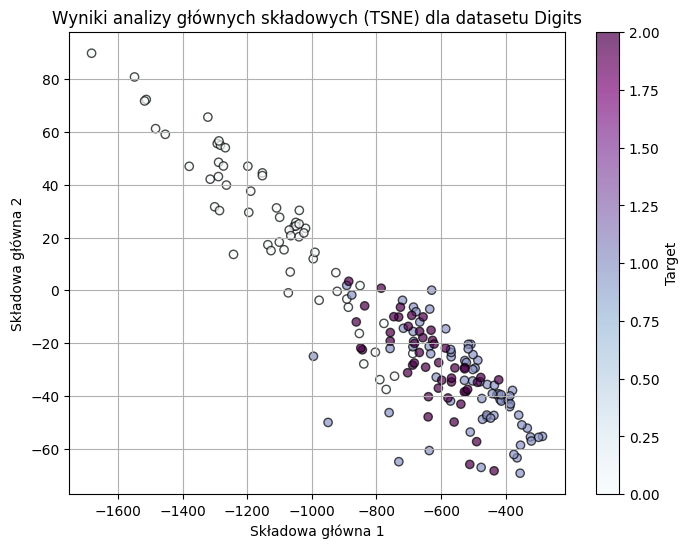

In [13]:
# Wykres wyników  SVD
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['target'], cmap='BuPu', edgecolor='k', alpha=0.7)
plt.title('Wyniki analizy głównych składowych (TSNE) dla datasetu Digits')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
# Dodanie legendy z etykietami klas
plt.colorbar(scatter, label='Target')
plt.show()

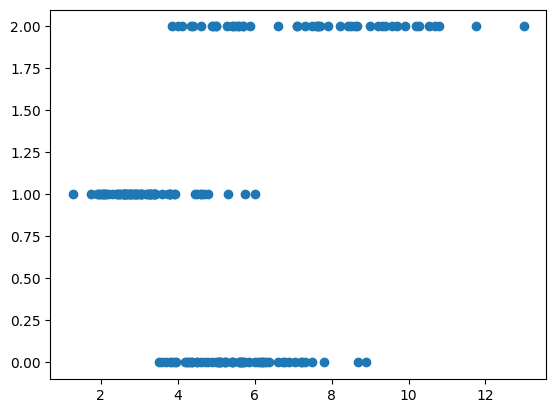

In [21]:
# Intensywność kolorystyczna rodzaji win
plt.scatter(df["color_intensity"], df["target"])

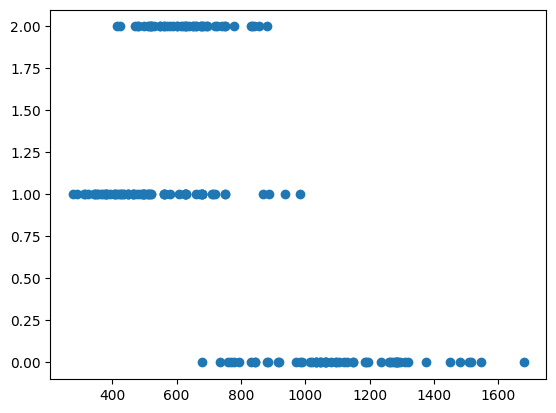

In [20]:
# Zawartość proliny
plt.scatter(df["proline"], df["target"])